# A Computational Exploration of Electrostatics
Dylan VanAllen

Syracuse University

PHY524: Electromagnetism


## Introduction: The Electric Field and Electric Potential
An electric field $\vec{E}$ is produced by the existence of charge, and produces a force on any charge $Q$ given by $\vec{F}=Q\vec{E}$.  The field from a collection of point charges $q_i$ each a distance $s_i$ from the test charge $Q$ is given by:
$$
\vec{E}(\vec{r})=\frac{1}{4\pi\epsilon_0}\sum_{i=1}^\infty\frac{q_i}{s_i^2}\hat{s}_i \tag{1}
$$

An example of determining the electric field on a test charge knowing the locations of each charge and the magnitude of the charges is given below. The charges are configured such that eight charges are each sitting on the corner of a $1\times 1\times 1$ cube in the positive octant of the cartesian grid. The four points sitting on the $xy$ plane each have charge $q$ and the four points sitting on the $z=1$ plane each have charge $-q$. We will determine the field at $(0.5,0.5,2)$, a point above the middle of the cube.


In [15]:
import numpy as np
e_0 = 8.854e-12
r = np.array([0.5,0.5,2]) # location at which we want to know the E field

#locations of static charges producing the field
r_q=[np.array([0,0,0]),np.array([1,0,0]),np.array([0,1,0]),np.array([1,1,0]),
    np.array([0,0,1]),np.array([1,0,1]),np.array([0,1,1]),np.array([1,1,1])]

q=[1,1,1,1,-1,-1,-1,-1] #Magnitudes of each charge


E = np.array([0]) #We must sum over i (from equation 1)
for i in range(len(r_q)):
    s_i=r_q[i]-r #This is the displacement vector from each point charge to the point we want to know the E field at
    E = E + 1/(4*np.pi*e_0)*q[i]/np.linalg.norm(s_i)**2*s_i/np.linalg.norm(s_i) #Implementation of equation 1
print(E)


[0.00000000e+00 0.00000000e+00 1.20370294e+10]


Obviously, this method works for any arbitrary given $\vec{r}$, so we are done. However, sometimes rather than point charges, we deal with a continous charge distribution $\rho(\vec{r})$, which describes the charge per unit volume at each point. Given the charge distribution, the electric field from that distribution is given by
$$
\vec{E}(\vec{r})=\frac{1}{4\pi\epsilon_0}\int\frac{\rho(\vec{r}')}{s^2}\hat{s}d\tau'\tag{2}
$$
Where we integrate over all space. For any realistic physical charge distribution this essentially breaks down into integrating over the volume of that object with charge density, as anywhere that $\rho=0$ contributes nothing to the field. If there is charge density in a given region, then one uses $(2)$ to compute it. These equations completely describe the electric field due to discrete charges and continuous charge distributions. Since for any configuration of charge $\nabla\times\vec{E}=0$, we can define an scalar field called the electric potential $V$ that has a single value everywhere and whose gradient determines the electric field:
$$\vec{E}=-\nabla V$$

Another important property of the $\vec{E}$ field is Gauss' Law, which states that $\nabla\cdot\vec{E}=\frac{\rho}{\epsilon_0}$, or $$\oint\vec{E}\cdot d\vec{a}=\frac{q_{enc}}{\epsilon_0}\tag{3}$$
After some careful manipulation, another equivalent statement becomes relevant, Poisson's equation: $$\nabla^2V=-\frac{\rho}{\epsilon_0}$$
Because the electric field can be determined by the potential $V$, solving this equation using standard methods and integrating with boundary conditions to determine $\vec{E}$ may be easier than using $(1)$ or $(2)$. And when considering a region with no charge distribution, the right side becomes zero and is known as Laplace's equation:
$$\nabla^2V=0\tag{4}$$ 
All that is needed to determine $V$ completely and uniquely is the potential on the surface of the region being considered. The goal of this project is to explore a certain method of solving Laplace's equation called the __method of relaxation__ (Griffiths 4th ed., p. 116).

## Relaxation Method

The solutions to Laplace's equation in any number of dimension are subject to some rules (according to Griffiths). One rule is that they are as boring as possible. There are no local maxima or minima, and the potential at any point is equal to the average of the potential of points around it. That is, for two dimensions,$$V(x,y)=\frac{1}{2\pi R}\underset{\text{circle}}{\oint}Vdl$$
The relaxation method to utilize this in $2D$ to find $V$ in the region is as follows:
1. Discretize the space by splitting it into discrete chunks with some potential $V$ at each point.
2. Begin with guesses for $V$ inside the region and known values for $V$ on the surface.
3. Set the potential at each point equal to the average of the points above, below, to the left, and to the right of that point for every point in the region.
4. Repeat step 3 for many iterations. The potential at each point will converge to the solution of Laplace's equation.

I extend this into 3D simply by changing step 3 to be the average of points above and below in z, and to either side in x and y. Below is an example of computing the field near a square plate of known potential $1V$. The rest of the boundary potential is set to zero because there is no other potential in this example. Basically this is because $\lim_{r\to\infty}V=0$. 

All that is left is to take the gradient of the potential, which is quite easy using NumPy's `gradient` function.

Text(0.5, 0, 'Z')

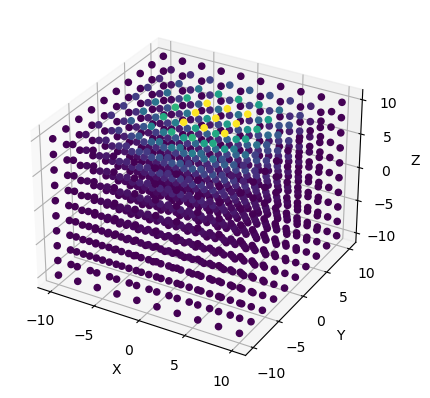

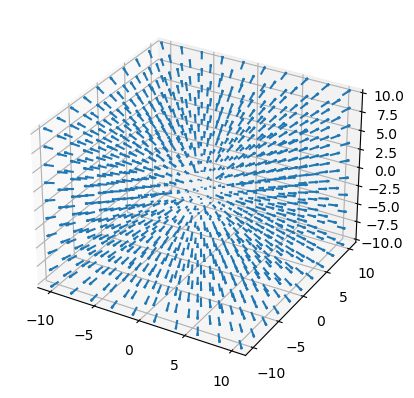

In [20]:
import matplotlib.pyplot as plt
import copy
num_iterations = int(1e5)

V = np.random.rand(10,10,10) #"Guesses" for the initial V at each point
#Boundary potentials
V[-1,:,:] = 0
V[0,:,:] = 0
V[:,-1,:] = 0
V[:,0,:] = 0
V[:,:,-1] = 0
V[:,:,0] = 0
V[4:7,4:7,-1]=1


for iteration in range(num_iterations):
    #Must copy so that each iteration uses the last iterations grid, not partially using values from this iteration
    V_new = copy.deepcopy(V)
    for X in range(1,9):
        for Y in range(1,9):
            if V[X,Y,-1] != 1:
                #If on the boundary but not the known part, set each potential as the average of potentials around it on surface
                V_new[X,Y,-1] = .25*(V[X+1,Y,-1]+V[X-1,Y,-1]+V[X,Y+1,-1]+V[X,Y-1,-1])
            for Z in range(8,0,-1):
                #If not on the boundary, set each potential to average of six points around it
                V_new[X,Y,Z] = 1/6*(V[X+1,Y,Z]+V[X-1,Y,Z]+V[X,Y+1,Z]+V[X,Y-1,Z]+V[X,Y,Z+1]+V[X,Y,Z-1])
    V = copy.deepcopy(V_new)
#Points for plotting
x,y,z=np.meshgrid(np.linspace(-10,10,10),np.linspace(-10,10,10),np.linspace(-10,10,10))

#The E field as just the gradient of V. Numpy sure is nice.
E = np.gradient(-1*V)

#This is just for plotting the V and E fields
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(x,y,z,c=V,alpha=1)
bx = plt.figure().add_subplot(projection='3d')
bx.quiver(x,y,z,x+E[0],y+E[1],z+E[2],normalize=True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
#plt.show()




It is easy to generalize this method to different boundary potentials. A future goal of this project is to implement a way to easily manually enter in arbitrary boundary potentials without altering code. However, this is more of a software engineering aspiration than a physics one. Here, we have shown how the method of relaxation is implemented in Python. As of now, arbitrary boundary potentials must be hard-coded into the `V` NumPy array and iteratively takes care of the rest until converging to the solution. 

### Thank you for reading! 